In [50]:
import pandas as pd
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [42]:
features   = [
                'hh_kinfit_chi2', 'hh_kinfit_m', 'sv_mass', 'dR_l1_l2_x_sv_pT', 'l_1_mt', 'l_2_pT', 'dR_l1_l2',
                'dphi_sv_met', 'h_bb_mass', 'b_2_hhbtag', 'diH_mass_sv', 'dphi_hbb_sv', 'h_bb_pT', 
                'dR_l1_l2_boosted_htt_met', 'l_1_pT', 'b_1_pT', 'phi', 'costheta_l2_httmet', 
                'b_1_cvsb', 'b_1_cvsl', 'boosted', 'channel', 'is_vbf', 'jet_1_quality', 'jet_2_quality', 'year']

In [12]:
import h5py
train_0 = h5py.File("/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/DNNTraining/NonResDNN/AN/DNNWeight_ZttHbb_FullRun2_0/DNNInputs/train_0.hdf5", "r")
train_1 = h5py.File("/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/DNNTraining/NonResDNN/AN/DNNWeight_ZttHbb_FullRun2_0/DNNInputs/train_1.hdf5", "r")
train_0.keys(), train_0["fold_0"].keys()

(<KeysViewHDF5 ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'meta_data']>,
 <KeysViewHDF5 ['inputs', 'targets', 'weights']>)

In [25]:
train_0["meta_data"].keys(), train_0["meta_data/wgt_feat"]

(<KeysViewHDF5 ['cat_feats', 'cont_feats', 'targ_feats', 'wgt_feat']>,
 <HDF5 dataset "wgt_feat": shape (), type "|O">)

In [28]:
np.concatenate([train_0["fold_0"]["inputs"], train_0["fold_1"]["inputs"]])

array([[-3.2907122e-01,  1.9493385e-01, -7.9089636e-01, ...,
         3.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [-3.8719672e-01, -4.8722884e-01, -6.0812507e-02, ...,
         2.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [-3.9886963e-01, -7.1639726e-05, -3.3958197e-01, ...,
         1.0000000e+00,  4.0000000e+00,  0.0000000e+00],
       ...,
       [           nan, -1.8820062e+00,  3.0031523e-01, ...,
         4.0000000e+00,  4.0000000e+00,  2.0000000e+00],
       [-3.3280262e-01,  7.3043853e-01,  2.5700292e-01, ...,
         4.0000000e+00,  4.0000000e+00,  2.0000000e+00],
       [           nan, -1.8820062e+00,  1.4984854e-01, ...,
         2.0000000e+00,  4.0000000e+00,  2.0000000e+00]], dtype=float32)

In [44]:
def merge_folds_all(key:str):
    return np.concatenate([train_0[f"fold_{i}"][key] for i in range(10)] + [train_1[f"fold_{i}"][key] for i in range(10)])
def merge_folds(key:str, evenOrOdd:int):
    if evenOrOdd == 0: train = train_0
    else: train = train_1
    return np.concatenate([train[f"fold_{i}"][key] for i in range(10)])
inputs, targets, weights = merge_folds_all("inputs"), merge_folds_all("targets"), merge_folds_all("weights")
inputs_0, targets_0, weights_0 = merge_folds("inputs", 0), merge_folds("targets", 0), merge_folds("weights", 0)
inputs_1, targets_1, weights_1 = merge_folds("inputs", 1), merge_folds("targets", 1), merge_folds("weights", 1)

In [41]:
inputs[:1000, 0]

array([-3.29071224e-01, -3.87196720e-01, -3.98869634e-01,  1.83490944e+00,
       -3.65984142e-01,  5.29814541e-01, -3.90841931e-01, -3.95477206e-01,
       -3.44291568e-01, -3.77469122e-01, -3.32248688e-01,  1.68302345e+00,
       -3.94572288e-01, -3.97039413e-01, -3.28071773e-01, -3.89058411e-01,
        2.30231953e+00, -3.84937644e-01, -3.42250526e-01, -1.81777060e-01,
       -3.48374993e-01, -3.90684217e-01, -3.72844428e-01, -3.09018105e-01,
       -2.43389189e-01, -3.96261990e-01, -3.88279885e-01, -3.72709155e-01,
       -3.84764075e-01, -3.43437105e-01, -3.43807220e-01,  2.85888863e+00,
       -1.47959903e-01, -3.82495731e-01, -3.47894520e-01, -3.95127267e-01,
        1.85123608e-01, -3.02782178e-01, -3.43487889e-01, -2.53264099e-01,
       -3.65185648e-01, -3.86920273e-01, -3.80530745e-01, -3.88469070e-01,
       -2.64255881e-01, -2.32659802e-01,  2.91744256e+00, -3.83860171e-01,
       -3.50629270e-01,  8.83107471e+00, -3.98218274e-01, -2.40504727e-01,
       -3.48732591e-01, -

In [36]:
np.count_nonzero(np.isnan(inputs[:, 0]))/inputs.shape[0]

0.10385209524997217

In [43]:
len(features), inputs.shape

(26, (11041809, 26))

/opt/exp_soft/llr/python/3.11.8/el7/lib/python3.11/site-packages/mplhep/plot.py:592: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f224ac91690>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f224ad60490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

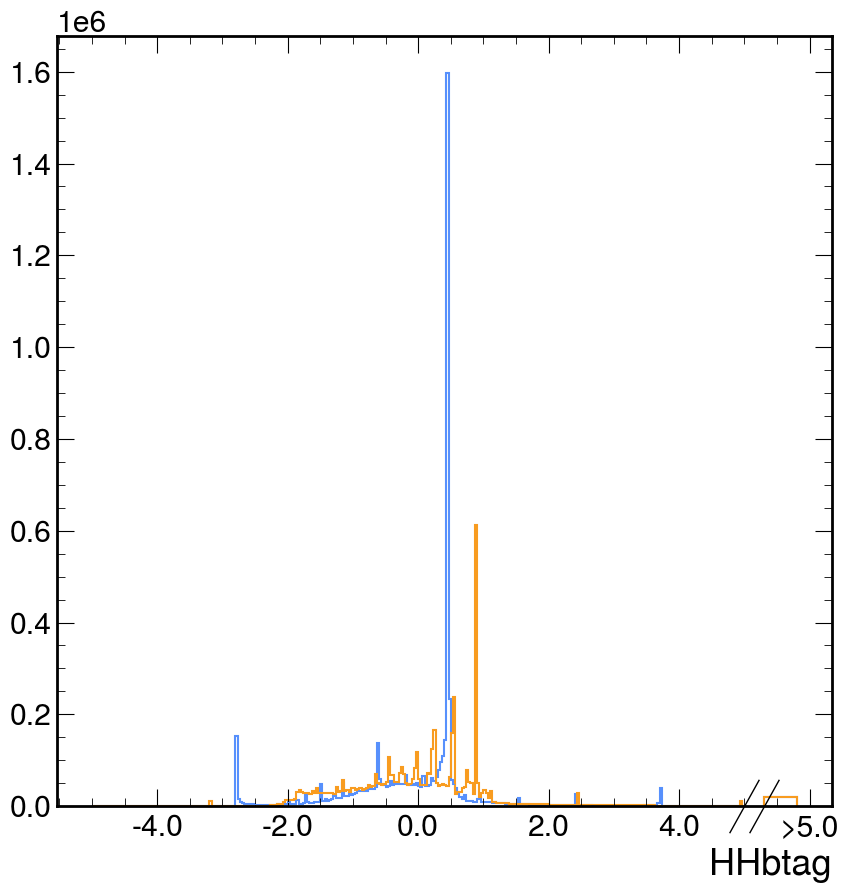

In [52]:
hhbtag_axis = hist.axis.Regular(300, -5, 5, name="HHbtag")
hhbtag_0 = hist.Hist(hhbtag_axis, name="hhbtag_0").fill(inputs_0[:, features.index("b_2_hhbtag")])
hhbtag_1 = hist.Hist(hhbtag_axis, name="hhbtag_1").fill(inputs_1[:, features.index("b_2_hhbtag")])
hep.histplot([hhbtag_0, hhbtag_1], flow="show")